In [1]:
import os
import xarray as xr
from glob import glob
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
parentdir="/glade/scratch/lamar/Data/PM2.5/Baseline_2015_Population_2015/"
ssps = ["ssp119","ssp126","ssp245","ssp370","ssp585"] # "ssp434","ssp460","ssp534os",
year="209*"
regions=["USA","India","China","World"]
var_name=['post25']
disease="Allcause"

In [29]:
#
# create array
#
max_num_files=500
idx_files=np.arange(0,max_num_files)
num_ssps = len(ssps)
idx_ssps=np.arange(0,num_ssps)
data = np.empty((max_num_files,num_ssps,4)) # 4 is number of regions
data[:,:,:] = np.NaN

In [30]:
#
# loop over SSPs
#
i = 0
for ssp in ssps:
#
# create list of files
#
    files=sorted(glob(parentdir + ssp + "/*" + year + "_" + disease + "_CountryMortalityAbsolute_GEMM.csv"))
    j=0
    for file in files:
    #
    # read csv file; only extract specific variable
    #
        wk=pd.read_csv(file,usecols=var_name)
    #
    # extract regional data
    #
        data[j,i,0] = wk.iloc[183]       # US
        data[j,i,1] = wk.iloc[77]        # India
        data[j,i,2] = wk.iloc[35]        # China
        data[j,i,3] = wk.iloc[1:].sum()  # World
    #
    # increment counter for files
    #
        j += 1
    #
    # increment counter for SSPs
    #
    i += 1

In [31]:
#
# loop over regions
#
#for nreg in range(0,4):
#    #
#    # create dataframe (needed by seaborn)
#    #
#    health_data = pd.DataFrame(data=data[:,:,nreg], index=idx_files, columns=ssps)
#    #print(health_data)
#    ax = sns.boxplot(data=health_data, showfliers = False)
#    plt.savefig("Output/test_" + regions[nreg] + ".png")
#    plt.show()
#    del ax 
#    del health_data



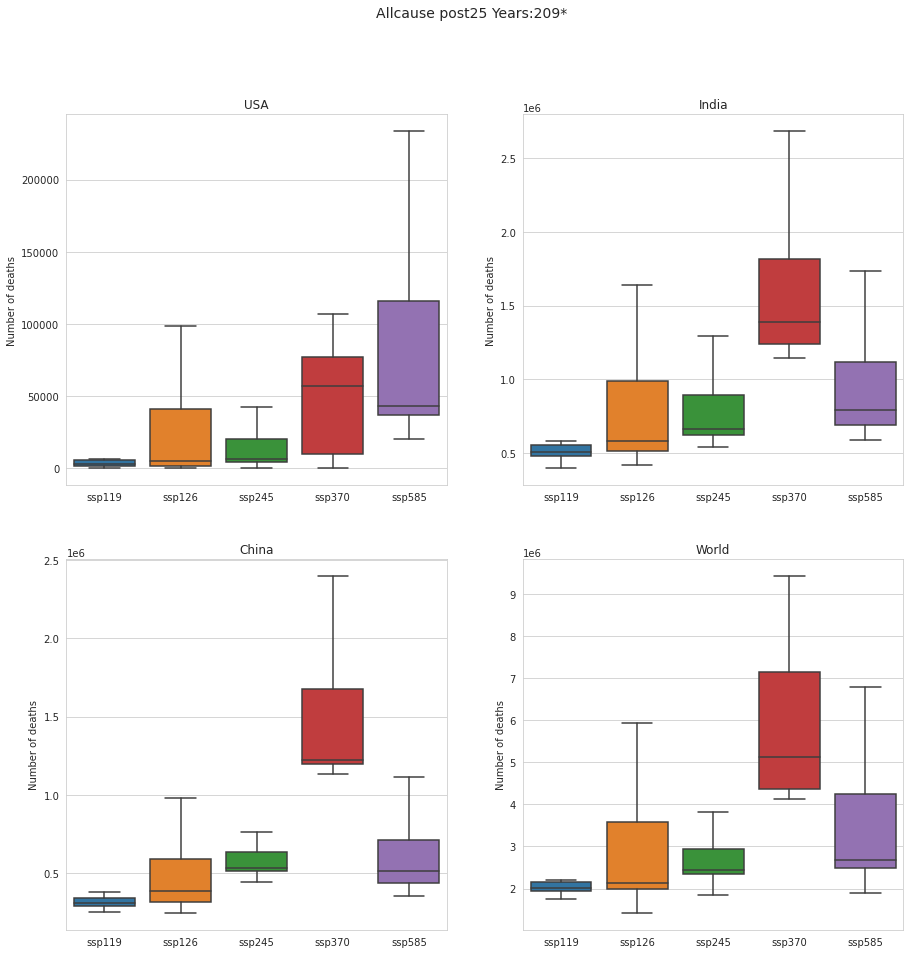

In [32]:
#
# define 2x2 grid
#
f = plt.figure(figsize=(15,15))
gs = f.add_gridspec(2, 2)
#
title = disease + " " + str(var_name)[2:-2] + " Years:" + year
f.suptitle(title, fontsize=14)
#
i1=0
i2=0
sns.set_style("whitegrid")
for nreg in range(0,4):
    #
    # create dataframe (needed by seaborn)
    #
    health_data = pd.DataFrame(data=data[:,:,nreg], index=idx_files, columns=ssps)
    ax = f.add_subplot(gs[i1,i2])
    ax.set_title(regions[nreg])
    ax.set_ylabel("Number of deaths")
    sns.boxplot(data=health_data, showfliers = False)
    #
    i2=i2+1
    if i2 == 2:
        i1=i1+1
        i2=0
#
# save figure
#
output_file = "Output/" + disease + "_" + str(var_name)[2:-2] + "_" + year.replace("*","s") + ".png"
plt.savefig(output_file)
plt.show()

In [33]:
print(year)

209*
